In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
x = df.drop('output',axis=1)
y = df['output']

In [10]:
tree = DecisionTreeClassifier()
model = tree.fit(x,y)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=41)

In [12]:
tree2 = DecisionTreeClassifier()
model2 = tree2.fit(x_train,y_train)

In [13]:
model.score(x,y) # train test split olmadan doğruluk oranı %100 çıktı
# Overfitting durumu var aşırı öğrenmeyi engellemek için train test kullanıyoruz

1.0

In [14]:
model2.score(x_test,y_test)

0.7472527472527473

In [15]:
model.predict([[31,1,2,130,240,0,0,150,0,2,0,0,2]])

array([1])

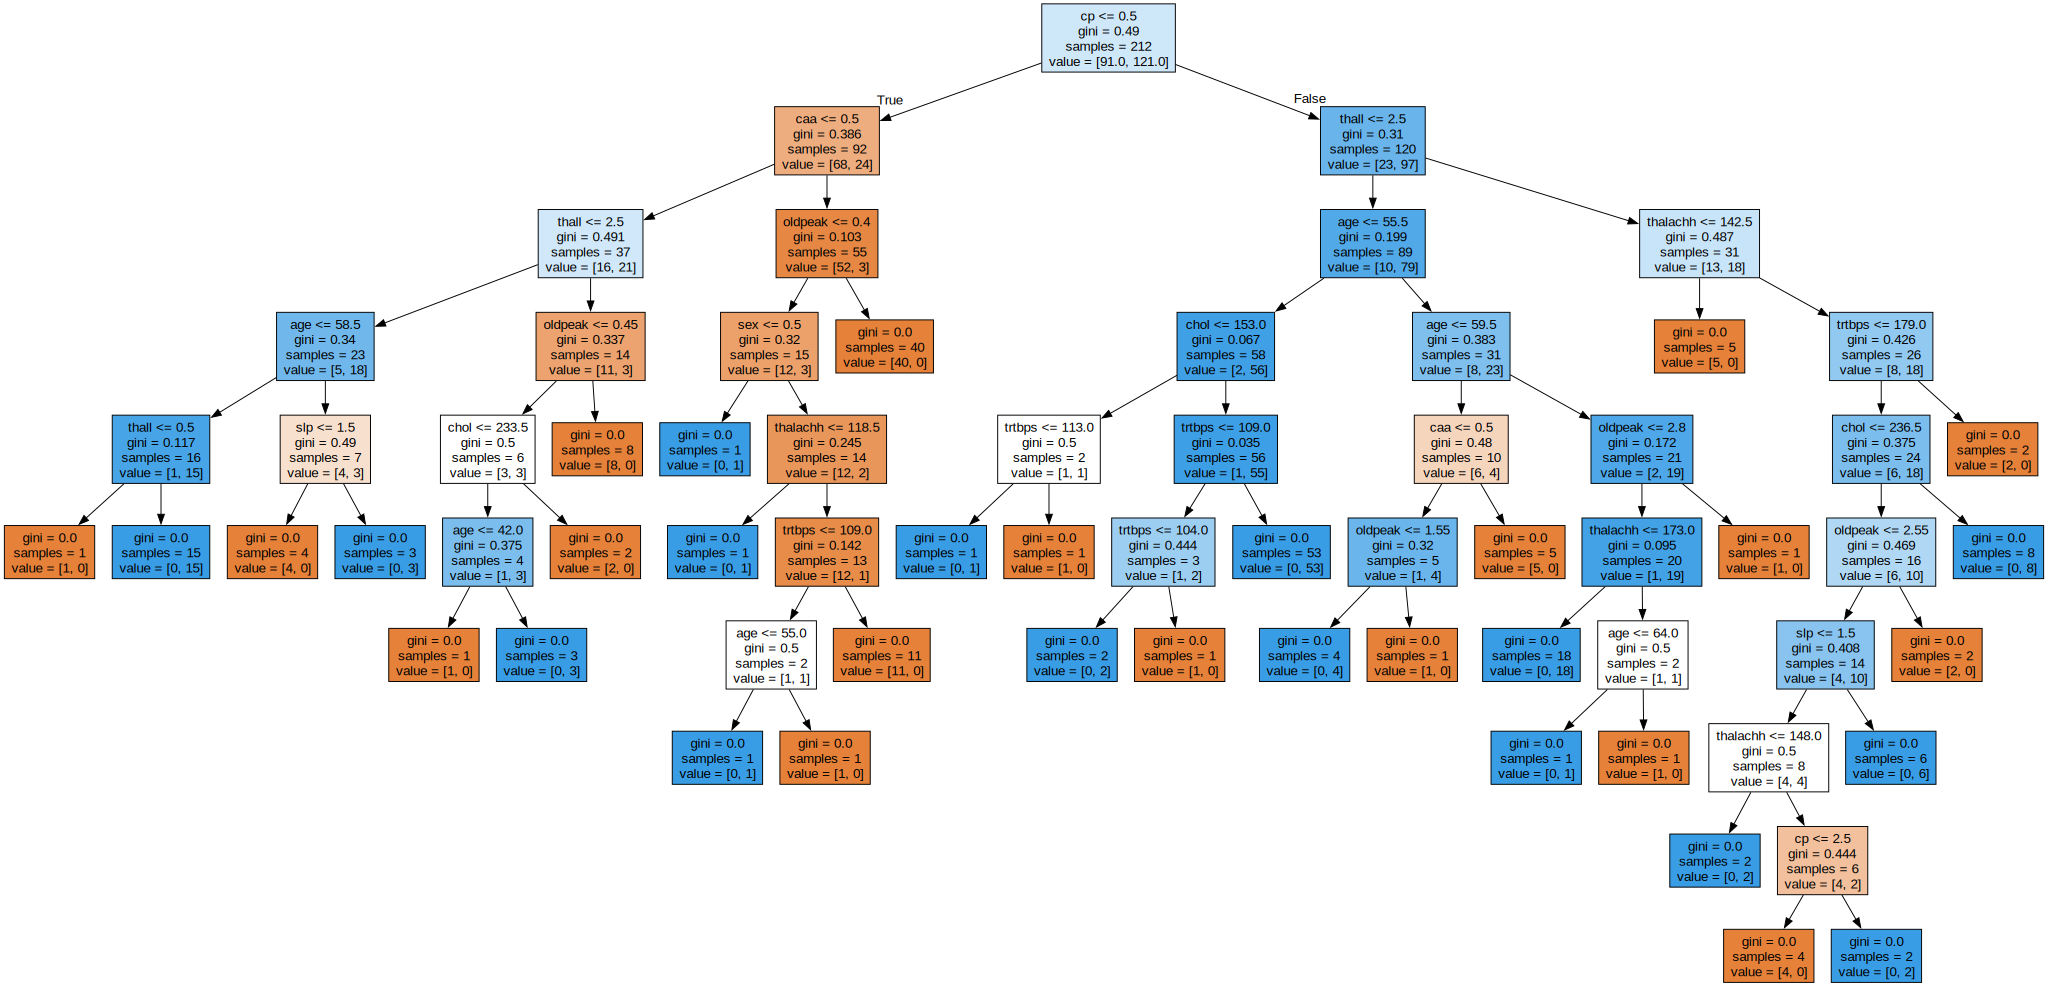

In [16]:
dot = export_graphviz(model2,feature_names=x.columns,filled=True)
gorsel = graphviz.Source(dot) # Decision modelini görselleştiriyoruz
gorsel

In [17]:
# Random Forest - Decision treenin bir çeşididir overfitting durumunu engeller

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
forest = RandomForestClassifier()
model3 = forest.fit(x,y)
model3.score(x,y)

1.0

In [30]:
forest2 = RandomForestClassifier(n_estimators=400,max_depth=4) # n_estimators ağaç sayısını belirler
model4 = forest2.fit(x_train,y_train) # max_depthte üstteki resimdeki derinliği belirler
model4.score(x_test,y_test) # eğer derinliği az bir şekilde güzel sonuç alırsak ezbere dayalı sonucu engelleyebiliriz

0.8681318681318682